In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
calibrator = Calibrator('calibration.pkl',redo=True)
calibrator.create_all_teams()
calibrator.process_data(verbose=True)
teams=calibrator.teams
calibrator.get_current_results('BPL').tail(10)

Force recalibrate
calibration.pkl  exists.
(Timestamp('2018-07-28 00:00:00'), 'Ural Sverdlovsk Oblast', 'Anzhi Makhachkala', 0, 1)
(Timestamp('2018-07-28 00:00:00'), 'Spartak Moscow', 'Gazovik Orenburg', 1, 0)
(Timestamp('2018-07-28 00:00:00'), 'Rostov', 'Terek Grozny', 1, 0)
(Timestamp('2018-07-29 00:00:00'), 'Metallurg Krasnoyarsk', 'Zenit St Petersburg', 0, 2)
(Timestamp('2018-07-29 00:00:00'), 'FC Arsenal Tula', 'Dinamo Moscow', 0, 0)
(Timestamp('2018-07-29 00:00:00'), 'Rubin Kazan', 'FC Krasnodar', 2, 1)
(Timestamp('2018-07-30 00:00:00'), 'FC Ufa', 'Lokomotiv Moscow', 0, 0)
(Timestamp('2018-07-31 00:00:00'), 'Krylia Sovetov', 'CSKA Moscow', 0, 0)
(Timestamp('2018-08-03 00:00:00'), 'Dinamo Moscow', 'Rubin Kazan', 1, 1)
(Timestamp('2018-08-04 00:00:00'), 'Ural Sverdlovsk Oblast', 'FC Krasnodar', 1, 2)
(Timestamp('2018-08-04 00:00:00'), 'Zenit St Petersburg', 'FC Arsenal Tula', 1, 0)
(Timestamp('2018-08-04 00:00:00'), 'Lokomotiv Moscow', 'Spartak Moscow', 0, 0)
(Timestamp('2018-08-05

(Timestamp('2018-09-02 00:00:00'), 'Zenit St Petersburg', 'Spartak Moscow', 0, 0)
(Timestamp('2018-09-02 00:00:00'), 'Barcelona', 'SD Huesca', 8, 2)
(Timestamp('2018-09-02 00:00:00'), 'C.D. Nacional', 'Benfica', 0, 4)
(Timestamp('2018-09-02 00:00:00'), 'Torino', 'Spal', 1, 0)
(Timestamp('2018-09-02 00:00:00'), 'Sampdoria', 'Napoli', 3, 0)
(Timestamp('2018-09-02 00:00:00'), 'Sassuolo', 'Genoa', 5, 3)
(Timestamp('2018-09-02 00:00:00'), 'Atalanta', 'Cagliari', 0, 1)
(Timestamp('2018-09-02 00:00:00'), 'Lazio', 'Frosinone', 1, 0)
(Timestamp('2018-09-02 00:00:00'), 'Chievo Verona', 'Empoli', 0, 0)
(Timestamp('2018-09-02 00:00:00'), 'Terek Grozny', 'FC Ufa', 2, 1)
(Timestamp('2018-09-02 00:00:00'), 'Real Betis', 'Sevilla FC', 1, 0)
(Timestamp('2018-09-02 00:00:00'), 'AS Monaco', 'Marseille', 2, 3)
(Timestamp('2018-09-02 00:00:00'), 'FC Porto', 'Moreirense', 3, 0)
(Timestamp('2018-09-14 00:00:00'), 'Lokomotiv Moscow', 'Dinamo Moscow', 1, 1)
(Timestamp('2018-09-14 00:00:00'), 'Nice', 'Stade Ren

(Timestamp('2018-09-22 00:00:00'), 'St Etienne', 'Caen', 2, 1)
(Timestamp('2018-09-22 00:00:00'), 'Strasbourg', 'Amiens', 3, 1)
(Timestamp('2018-09-22 00:00:00'), 'Maritimo', 'Belenenses', 0, 0)
(Timestamp('2018-09-22 00:00:00'), 'Sampdoria', 'Internazionale', 0, 1)
(Timestamp('2018-09-22 00:00:00'), 'Real Madrid', 'Espanyol', 1, 0)
(Timestamp('2018-09-22 00:00:00'), 'Vitesse', 'ADO Den Haag', 1, 1)
(Timestamp('2018-09-22 00:00:00'), 'Vitoria Setubal', 'FC Porto', 0, 2)
(Timestamp('2018-09-23 00:00:00'), 'Levante', 'Sevilla FC', 2, 6)
(Timestamp('2018-09-23 00:00:00'), 'Feyenoord', 'FC Utrecht', 1, 0)
(Timestamp('2018-09-23 00:00:00'), 'Torino', 'Napoli', 1, 3)
(Timestamp('2018-09-23 00:00:00'), 'West Ham United', 'Chelsea', 0, 0)
(Timestamp('2018-09-23 00:00:00'), 'Emmen', 'PEC Zwolle', 0, 1)
(Timestamp('2018-09-23 00:00:00'), 'FC Groningen', 'AZ', 1, 3)
(Timestamp('2018-09-23 00:00:00'), 'Chievo Verona', 'Udinese', 0, 2)
(Timestamp('2018-09-23 00:00:00'), 'Stade Rennes', 'Paris Saint

(Timestamp('2018-10-02 00:00:00'), 'Manchester United', 'Valencia', 0, 0)
(Timestamp('2018-10-03 00:00:00'), 'Paris Saint-Germain', 'Red Star Belgrade', 6, 1)
(Timestamp('2018-10-03 00:00:00'), 'Lokomotiv Moscow', 'Schalke 04', 0, 1)
(Timestamp('2018-10-03 00:00:00'), 'Atletico Madrid', 'Club Brugge', 3, 1)
(Timestamp('2018-10-03 00:00:00'), 'Napoli', 'Liverpool', 1, 0)
(Timestamp('2018-10-03 00:00:00'), 'Tottenham Hotspur', 'Barcelona', 2, 4)
(Timestamp('2018-10-03 00:00:00'), 'FC Porto', 'Galatasaray', 1, 0)
(Timestamp('2018-10-03 00:00:00'), 'PSV', 'Internazionale', 1, 2)
(Timestamp('2018-10-03 00:00:00'), 'Borussia Dortmund', 'AS Monaco', 3, 0)
(Timestamp('2018-10-04 00:00:00'), 'FC Astana', 'Stade Rennes', 2, 0)
(Timestamp('2018-10-04 00:00:00'), 'Bordeaux', 'FC Copenhagen', 1, 2)
(Timestamp('2018-10-04 00:00:00'), 'FK Qarabag', 'Arsenal', 0, 3)
(Timestamp('2018-10-04 00:00:00'), 'Anderlecht', 'Dinamo Zagreb', 0, 2)
(Timestamp('2018-10-04 00:00:00'), 'Bayer Leverkusen', 'AEK Larna

(Timestamp('2018-10-21 00:00:00'), 'SD Huesca', 'Espanyol', 0, 2)
(Timestamp('2018-10-21 00:00:00'), 'Internazionale', 'AC Milan', 1, 0)
(Timestamp('2018-10-21 00:00:00'), 'Real Betis', 'Real Valladolid', 0, 1)
(Timestamp('2018-10-21 00:00:00'), 'Nice', 'Marseille', 0, 1)
(Timestamp('2018-10-22 00:00:00'), 'Sampdoria', 'Sassuolo', 0, 0)
(Timestamp('2018-10-22 00:00:00'), 'Arsenal', 'Leicester City', 3, 1)
(Timestamp('2018-10-22 00:00:00'), 'Real Sociedad', 'Girona FC', 0, 0)
(Timestamp('2018-10-23 00:00:00'), 'Young Boys', 'Valencia', 1, 1)
(Timestamp('2018-10-23 00:00:00'), 'AEK Athens', 'Bayern Munich', 0, 2)
(Timestamp('2018-10-23 00:00:00'), 'Ajax', 'Benfica', 1, 0)
(Timestamp('2018-10-23 00:00:00'), 'TSG Hoffenheim', 'Lyon', 3, 3)
(Timestamp('2018-10-23 00:00:00'), 'AS Roma', 'CSKA Moscow', 3, 0)
(Timestamp('2018-10-23 00:00:00'), 'Real Madrid', 'Viktoria Plzen', 2, 1)
(Timestamp('2018-10-23 00:00:00'), 'Shakhtar Donetsk', 'Manchester City', 0, 3)
(Timestamp('2018-10-23 00:00:00')

(Timestamp('2018-11-04 00:00:00'), 'FC Utrecht', 'ADO Den Haag', 3, 0)
(Timestamp('2018-11-04 00:00:00'), 'Parma', 'Frosinone', 0, 0)
(Timestamp('2018-11-04 00:00:00'), 'Chievo Verona', 'Sassuolo', 0, 2)
(Timestamp('2018-11-04 00:00:00'), 'Sampdoria', 'Torino', 1, 4)
(Timestamp('2018-11-04 00:00:00'), 'Nantes', 'Guingamp', 5, 0)
(Timestamp('2018-11-04 00:00:00'), 'Borussia Monchengladbach', 'Fortuna Düsseldorf', 3, 0)
(Timestamp('2018-11-04 00:00:00'), 'Feirense', 'Tondela', 2, 4)
(Timestamp('2018-11-04 00:00:00'), 'Manchester City', 'Southampton', 6, 1)
(Timestamp('2018-11-04 00:00:00'), 'Villarreal', 'Levante', 1, 1)
(Timestamp('2018-11-04 00:00:00'), 'St Etienne', 'Angers', 4, 3)
(Timestamp('2018-11-04 00:00:00'), 'Chelsea', 'Crystal Palace', 3, 1)
(Timestamp('2018-11-04 00:00:00'), 'Spartak Moscow', 'Ural Sverdlovsk Oblast', 1, 2)
(Timestamp('2018-11-04 00:00:00'), 'Bologna', 'Atalanta', 1, 2)
(Timestamp('2018-11-04 00:00:00'), 'Mainz', 'Werder Bremen', 2, 1)
(Timestamp('2018-11-04

(Timestamp('2018-11-24 00:00:00'), 'Paris Saint-Germain', 'Toulouse', 1, 0)
(Timestamp('2018-11-24 00:00:00'), 'Juventus', 'Spal', 2, 0)
(Timestamp('2018-11-24 00:00:00'), 'NAC', 'Ajax', 0, 3)
(Timestamp('2018-11-24 00:00:00'), 'SD Huesca', 'Levante', 2, 2)
(Timestamp('2018-11-24 00:00:00'), 'Tottenham Hotspur', 'Chelsea', 3, 1)
(Timestamp('2018-11-24 00:00:00'), 'Schalke 04', '1. FC Nürnberg', 5, 2)
(Timestamp('2018-11-24 00:00:00'), 'PEC Zwolle', 'ADO Den Haag', 2, 3)
(Timestamp('2018-11-24 00:00:00'), 'Reims', 'Guingamp', 2, 1)
(Timestamp('2018-11-24 00:00:00'), 'Strasbourg', 'Nimes', 0, 1)
(Timestamp('2018-11-24 00:00:00'), 'Caen', 'AS Monaco', 0, 1)
(Timestamp('2018-11-24 00:00:00'), 'Nantes', 'Angers', 1, 1)
(Timestamp('2018-11-24 00:00:00'), 'Dijon FCO', 'Bordeaux', 0, 0)
(Timestamp('2018-11-24 00:00:00'), 'Internazionale', 'Frosinone', 3, 0)
(Timestamp('2018-11-24 00:00:00'), 'Fortuna Sittard', 'Heracles', 3, 0)
(Timestamp('2018-11-24 00:00:00'), 'PSV', 'Heerenveen', 3, 0)
(Tim

(Timestamp('2018-12-05 00:00:00'), 'Everton', 'Newcastle', 1, 1)
(Timestamp('2018-12-05 00:00:00'), 'Manchester United', 'Arsenal', 2, 2)
(Timestamp('2018-12-05 00:00:00'), 'Tottenham Hotspur', 'Southampton', 3, 1)
(Timestamp('2018-12-05 00:00:00'), 'Strasbourg', 'Paris Saint-Germain', 1, 1)
(Timestamp('2018-12-06 00:00:00'), 'Feyenoord', 'VVV Venlo', 4, 1)
(Timestamp('2018-12-07 00:00:00'), 'Fortuna Sittard', 'AZ', 0, 3)
(Timestamp('2018-12-07 00:00:00'), 'Werder Bremen', 'Fortuna Düsseldorf', 3, 1)
(Timestamp('2018-12-07 00:00:00'), 'Juventus', 'Internazionale', 1, 0)
(Timestamp('2018-12-07 00:00:00'), 'PSV', 'Excelsior', 6, 0)
(Timestamp('2018-12-07 00:00:00'), 'Leganes', 'Getafe', 1, 1)
(Timestamp('2018-12-07 00:00:00'), 'FC Porto', 'Portimonense', 4, 1)
(Timestamp('2018-12-08 00:00:00'), 'Krylia Sovetov', 'Rostov', 1, 0)
(Timestamp('2018-12-08 00:00:00'), 'Atletico Madrid', 'Alavés', 3, 0)
(Timestamp('2018-12-08 00:00:00'), 'CSKA Moscow', 'Metallurg Krasnoyarsk', 2, 1)
(Timestamp(

(Timestamp('2018-12-16 00:00:00'), 'Feyenoord', 'Fortuna Sittard', 0, 2)
(Timestamp('2018-12-16 00:00:00'), 'Liverpool', 'Manchester United', 3, 1)
(Timestamp('2018-12-16 00:00:00'), 'Nice', 'St Etienne', 1, 1)
(Timestamp('2018-12-16 00:00:00'), 'Cagliari', 'Napoli', 0, 1)
(Timestamp('2018-12-16 00:00:00'), 'Eintracht Frankfurt', 'Bayer Leverkusen', 2, 1)
(Timestamp('2018-12-16 00:00:00'), 'Maritimo', 'Benfica', 0, 1)
(Timestamp('2018-12-16 00:00:00'), 'SD Huesca', 'Villarreal', 2, 2)
(Timestamp('2018-12-16 00:00:00'), 'AS Roma', 'Genoa', 3, 2)
(Timestamp('2018-12-16 00:00:00'), 'Levante', 'Barcelona', 0, 5)
(Timestamp('2018-12-16 00:00:00'), 'Lyon', 'AS Monaco', 3, 0)
(Timestamp('2018-12-16 00:00:00'), 'Sporting CP', 'C.D. Nacional', 5, 2)
(Timestamp('2018-12-17 00:00:00'), 'Atalanta', 'Lazio', 1, 0)
(Timestamp('2018-12-17 00:00:00'), 'Alavés', 'Athletic Bilbao', 0, 0)
(Timestamp('2018-12-18 00:00:00'), 'Borussia Monchengladbach', '1. FC Nürnberg', 2, 0)
(Timestamp('2018-12-18 00:00:0

(Timestamp('2019-01-03 00:00:00'), 'Chaves', 'Feirense', 0, 0)
(Timestamp('2019-01-03 00:00:00'), 'Sporting CP', 'Belenenses', 2, 1)
(Timestamp('2019-01-03 00:00:00'), 'Manchester City', 'Liverpool', 2, 1)
(Timestamp('2019-01-03 00:00:00'), 'Desportivo Aves', 'FC Porto', 0, 1)
(Timestamp('2019-01-03 00:00:00'), 'Villarreal', 'Real Madrid', 2, 2)
(Timestamp('2019-01-04 00:00:00'), 'Levante', 'Girona FC', 2, 2)
(Timestamp('2019-01-04 00:00:00'), 'Espanyol', 'Leganes', 1, 0)
(Timestamp('2019-01-05 00:00:00'), 'Real Valladolid', 'Rayo Vallecano', 0, 1)
(Timestamp('2019-01-05 00:00:00'), 'Alavés', 'Valencia', 2, 1)
(Timestamp('2019-01-05 00:00:00'), 'SD Huesca', 'Real Betis', 2, 1)
(Timestamp('2019-01-05 00:00:00'), 'Maritimo', 'Portimonense', 2, 1)
(Timestamp('2019-01-06 00:00:00'), 'Eibar', 'Villarreal', 0, 0)
(Timestamp('2019-01-06 00:00:00'), 'Vitoria Setubal', 'Chaves', 0, 0)
(Timestamp('2019-01-06 00:00:00'), 'Feirense', 'Santa Clara', 2, 2)
(Timestamp('2019-01-06 00:00:00'), 'Belenen

,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
17163,2019-01-03,BPL,Manchester City,Liverpool,2,1,1.01,1.52,1.11,1.62
17259,2019-01-12,BPL,West Ham United,Arsenal,1,0,0.82,0.85,1.50,1.07
17264,2019-01-12,BPL,Crystal Palace,Watford,1,2,1.11,1.75,1.83,1.13
17269,2019-01-12,BPL,Burnley,Fulham,2,1,0.87,1.07,0.98,0.89
17272,2019-01-12,BPL,Brighton and Hove Albion,Liverpool,0,1,0.44,2.46,0.63,2.38
17273,2019-01-12,BPL,Leicester City,Southampton,1,2,1.59,1.26,2.29,0.86
17286,2019-01-12,BPL,Cardiff City,Huddersfield Town,0,0,0.16,0.47,0.65,1.58
17312,2019-01-12,BPL,Chelsea,Newcastle,2,1,1.40,0.46,1.27,0.99
17333,2019-01-13,BPL,Everton,AFC Bournemouth,2,0,1.68,1.81,1.86,1.82
17340,2019-01-13,BPL,Tottenham Hotspur,Manchester United,0,1,2.14,0.90,3.04,0.63


In [3]:
Teams=dict()
League=dict()

In [4]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2,nr_degr=4)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
GB,0,26.4,18,34,5,1,44.35,73.00,5.33,0.32,6.92,3.6244
SPD,0,25.9,18,34,5,1,38.29,68.57,4.53,0.27,7.69,3.3069
BPL,0,19.8,12,28,8,1,5.80,18.22,3.48,0.32,42.64,2.3664
ISA,0,19.4,12,27,8,1,5.29,17.07,3.07,0.29,46.24,2.1797
PL,0,18.0,10,26,8,2,3.21,10.80,3.51,0.37,59.23,2.2113
DE,0,15.8,8,24,8,2,1.35,5.10,4.06,0.51,75.22,1.9894
RPL,0,15.4,8,23,8,3,1.14,4.54,3.33,0.43,78.40,1.8981
FL1,0,14.3,7,22,8,3,0.57,2.70,3.58,0.50,83.66,1.7900


In [17]:
country='BPL'
lH,pH=calibrator.teams[country+'Home'].means()
lA,pA=calibrator.teams[country+'Away'].means()
home_advantage=np.array([lH-lA,pH/pA])
# home_advantage=np.array([0,1])
#home_advantage=[0,1]
print(home_advantage)
Teams[country]= calibrator.get_teams_for_league(country)
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=4)
League[country].process_current_results(calibrator.get_current_results(country))
League[country].simulate_season(n_scenarios=100000)
League[country].season_report()

[0.23943784 0.96438295]
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,57,97.1,91,103,2,1,84.78,100.00,5.44,0.13,0.00
Manchester City,50,90.8,83,97,3,1,15.10,99.97,6.64,0.26,0.00
Tottenham Hotspur,48,80.2,72,88,5,3,0.11,93.81,5.08,0.30,0.00
Chelsea,47,76.9,69,85,5,3,0.02,79.61,4.18,0.26,0.00
Manchester United,41,69.6,62,78,6,4,0.00,15.80,5.13,0.41,0.00
Arsenal,41,68.1,60,76,6,4,0.00,10.80,5.02,0.46,0.00
Watford,32,53.2,45,61,13,7,0.00,0.00,3.63,0.45,0.00
Everton,30,52.4,44,61,13,7,0.00,0.00,3.54,0.41,0.00
Leicester City,31,51.8,44,60,13,7,0.00,0.00,2.69,0.34,0.00
Wolverhampton,29,51.8,44,60,13,7,0.00,0.00,2.73,0.36,0.00


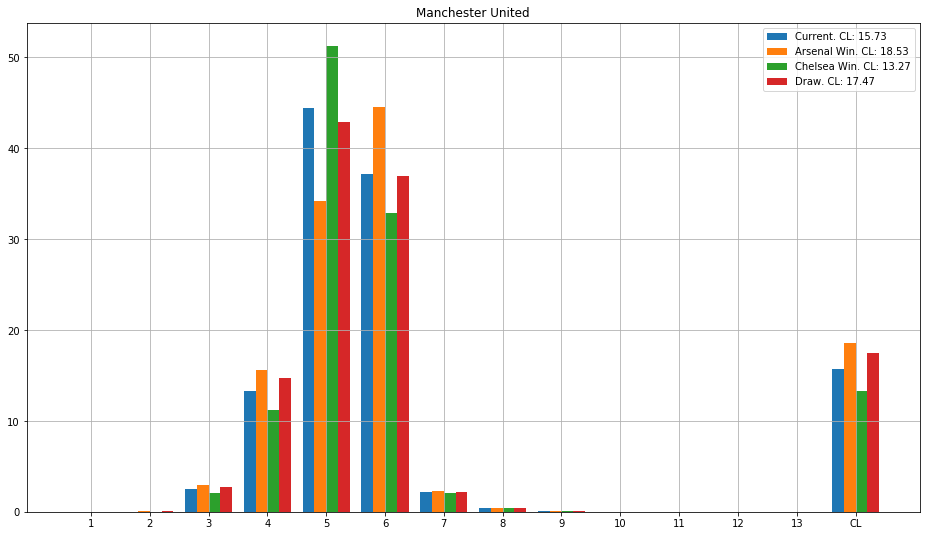

In [7]:
PremierLeague=League['BPL']
_,fig=PremierLeague.what_if('Arsenal v Chelsea',ref_team='Manchester United')

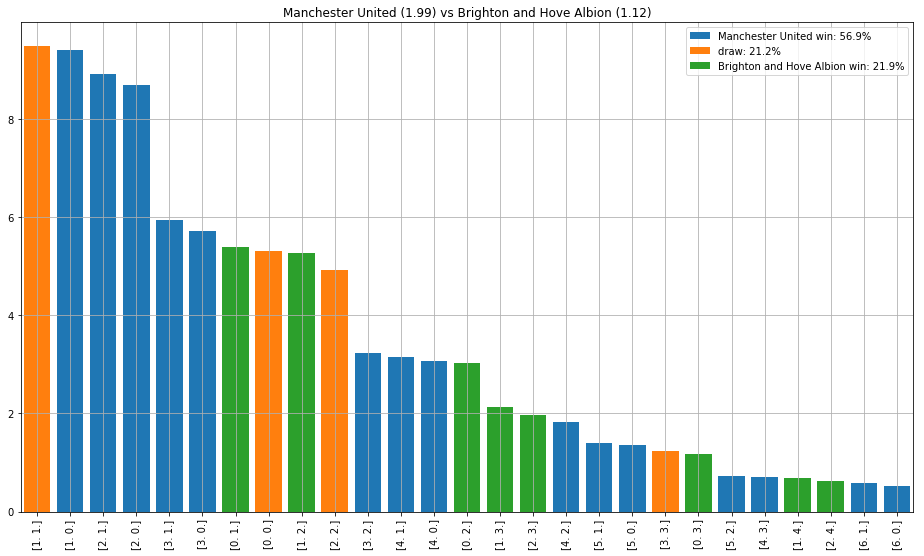

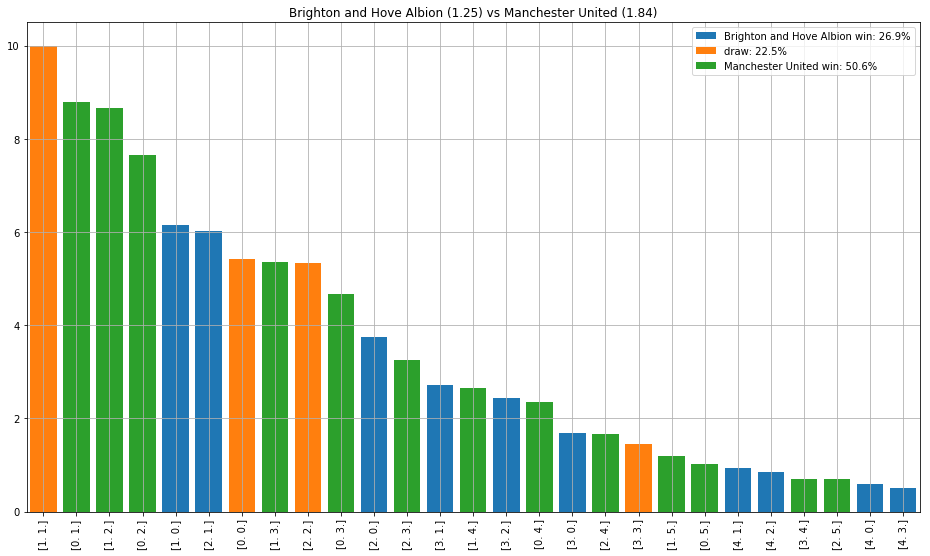

In [8]:
team1=teams['Manchester United']
team2=teams['Brighton and Hove Albion']
fig=plt.figure(1)
team1.outcomes_vs(team2,home_advantage=np.array([lH-lA,pH/pA]))
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=np.array([lH-lA,pH/pA]))
fig = plt.gcf()
fig.set_size_inches(16,9)

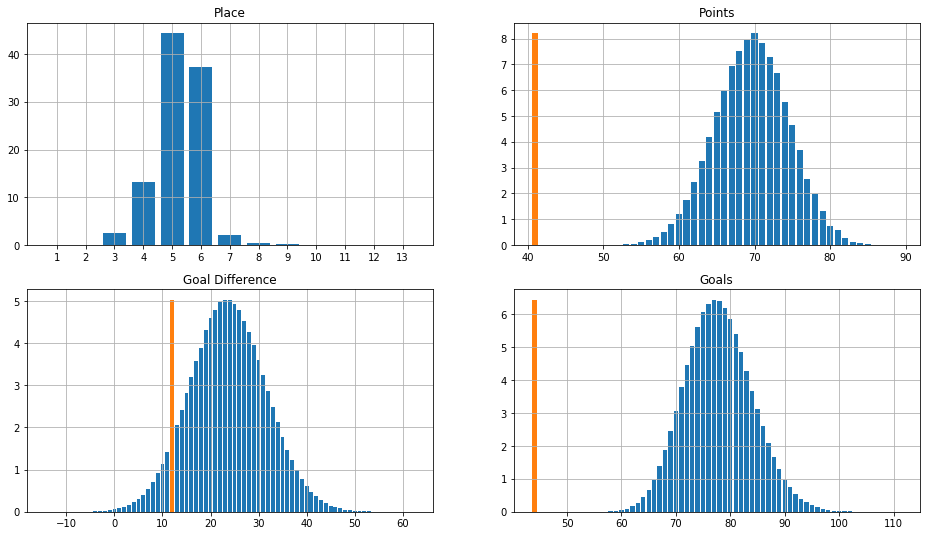

In [9]:
PremierLeague=League['BPL']
PremierLeague.team_report('Manchester United')

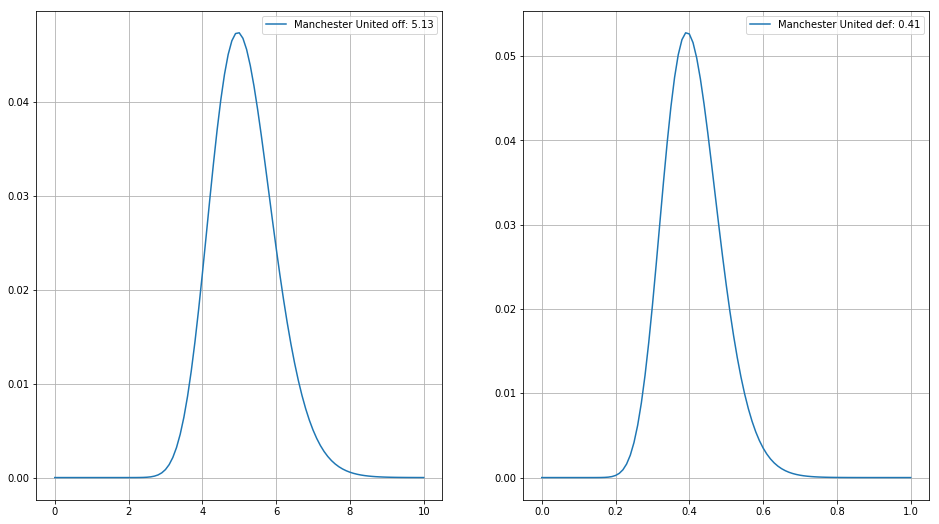

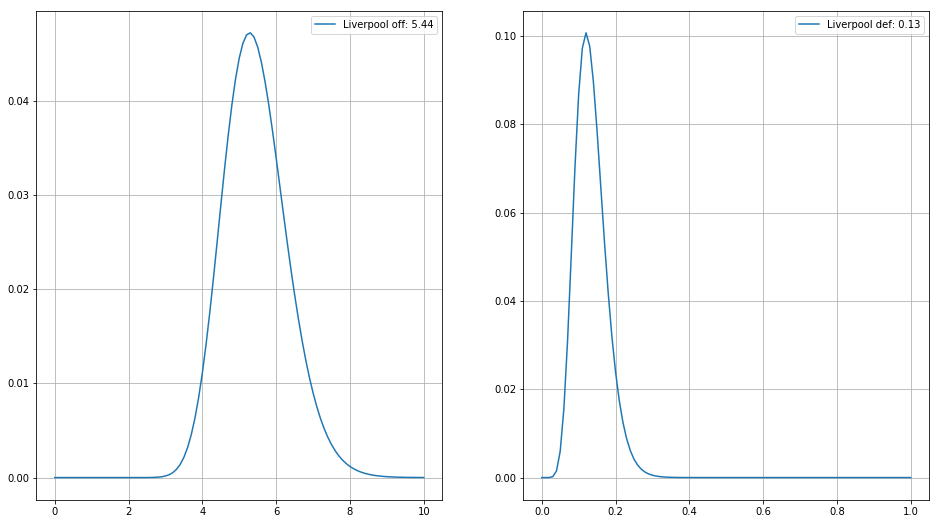

In [10]:
teams['Manchester United'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)
teams['Liverpool'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)

# Most important matches

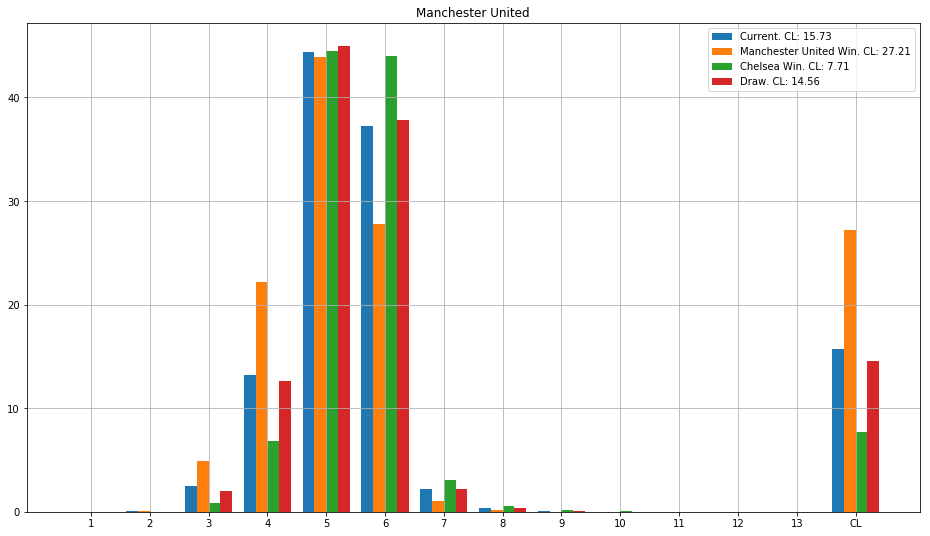

In [11]:
imp=[]
ref_team='Manchester United'
#ref_team='Liverpool'
#ref_team='Arsenal'
matches=[]
PremierLeague=League['BPL']
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl,_=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=4,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
_,fig=PremierLeague.what_if(the_match,ref_team=ref_team)

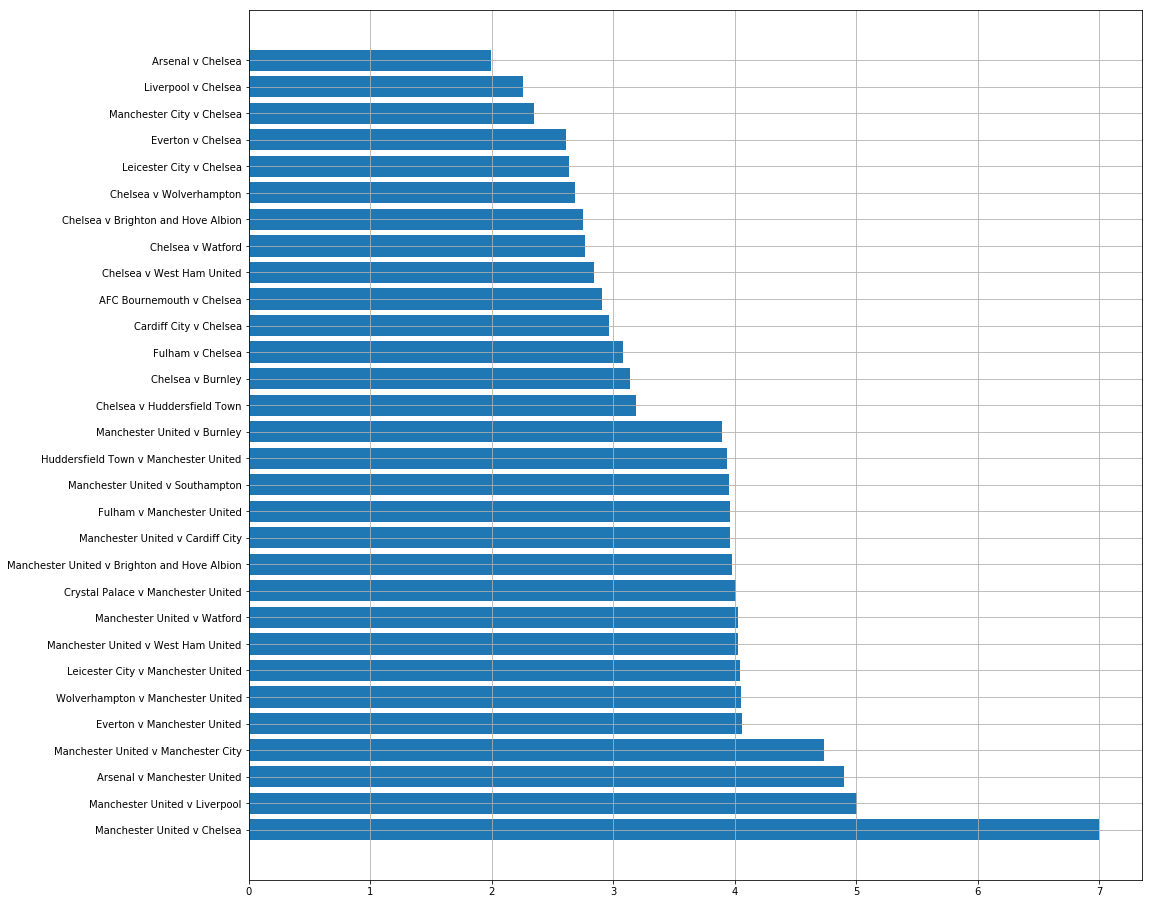

In [12]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(30)
plt.barh(xx,imp[xx])
plt.yticks(xx,matches[xx],rotation=0);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,16)

1.7893875

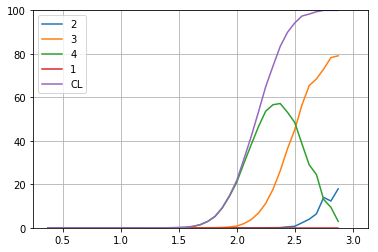

In [13]:
team_name='Manchester United'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n